In [1]:
import numpy as np
import pandas as pd
from scipy import stats as sts
import matplotlib.pyplot as plt
import math
import seaborn as sbn
from sklearn import metrics as mts
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
Norm_dist = sts.norm(0, 1) 
X = np.array(Norm_dist.rvs(100))

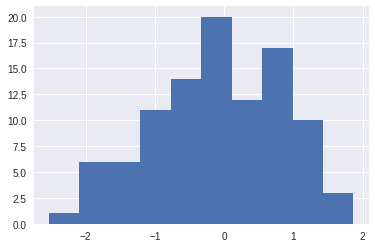

In [3]:
plt.hist(X)
plt.show()

Сопряженное к нормальному $ N(\theta, 1)$  :

Априорное распределение: $\theta \backsim N(a, \sigma^2)$

Состоятельная оценка: $\theta^* = E(\theta|X) = \frac{\sum^n_{i = 1} x_i + \frac{a}{\sigma^2}}{n + \frac{1}{\sigma^2}}$


Апостериорное распределение: $N( \left( \frac{\mu_0}{\sigma^2_0} + \frac{\sum^n_{i=1} x_i}{\sigma^2} \right) / \left( \frac{1}{\sigma^2_0} + \frac{n}{\sigma^2} \right) , \left( \frac{1}{\sigma^2_0} + \frac{n}{\sigma^2} \right)^{-1} )$

In [4]:
apr_parametrs = [(0, 1), (0, 100), (10, 1), (10, 100)]

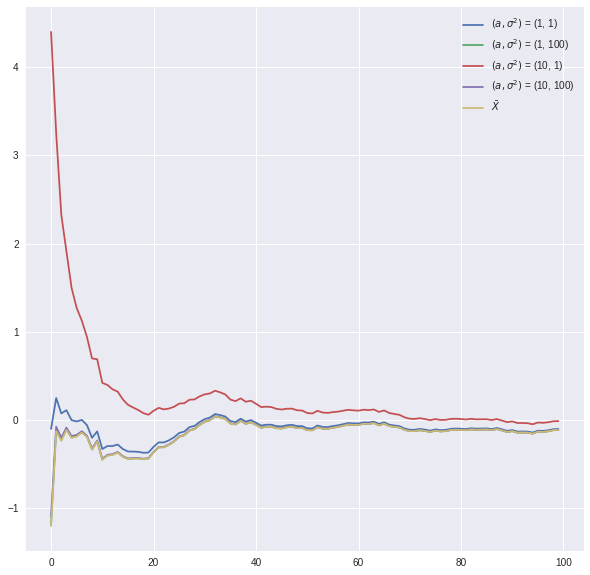

In [10]:
plt.figure(figsize=(10, 10))
for a, sigma in apr_parametrs:
    thetas = list(map(lambda n: (sum(X[:n]) + a / sigma) / (n + 1 / sigma), list(range(1, len(X) + 1))))
    plt.plot(list(range(len(X))), thetas, label='$(a, \\sigma^2)$ = (%d, %d)' %(a, sigma))
thetas = list(map(lambda n: sum(X[:n]) / n, range(1, len(X) + 1)))
plt.plot(list(range(len(X))), thetas, label='$\\bar{X}$')
plt.legend()

Из графиков видно следующее: основным параметром, влияющим на сходимость является сдвиг распределения -- третий график сильно выбивается. Так же видно, что оценка методом максимального правдоподобия очень близка по поведению ко второму и четвертому графику, это логично, так как при большой дисперсии у нас мало информации о распределении параметра, а оценка максимального правдоподобия -- случай, когда у нас нет такой иформации. Наилучшее поведение демонстрирует первая функция, так как оно наиболее сконцентрировано в районе реального значения параметра.

Сопряженное к $N(0, \theta)$:

Априорное распределение: $\Gamma^{-1}(\lambda, \alpha)$

Состоятельная оценка: $\theta^* = \frac{2\lambda + n}{2\alpha + \sum^n_{i = 1}x^2_i}$

In [6]:
apr_parametrs = [(1, 1), (1, 100), (10, 1), (10, 100)]

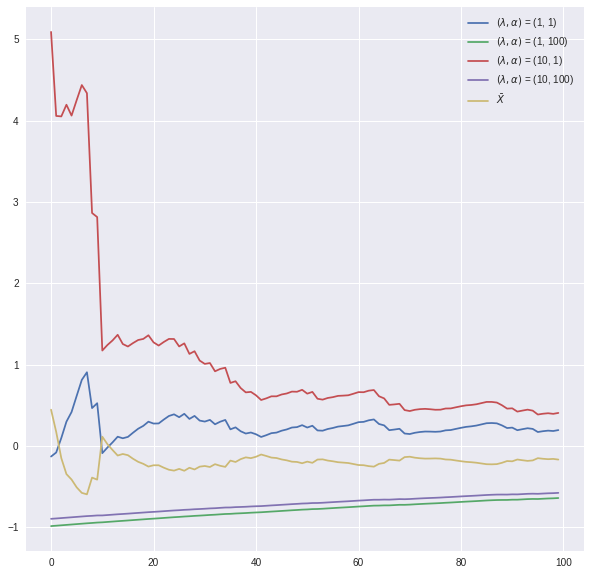

In [16]:
plt.figure(figsize=(10, 10))
for lambd, alpha in apr_parametrs:
    thetas = np.array(list(map(lambda n: (2 * lambd + n) / (2 * alpha + sum(X[:n]**2)),
                      list(range(1, len(X) + 1)))))
    plt.plot(list(range(len(X))), thetas - 1, label='$(\\lambda, \\alpha)$ = (%d, %d)' %(lambd, alpha))
thetas = np.array(list(map(lambda n: sum(X[:n]**2) / n, range(1, len(X) + 1))))
plt.plot(list(range(len(X))), thetas - 1, label='$\\bar{X}$')
plt.legend()

Из формулы для состоятельной оценки становится понятно пведение второй и четвертой функции -- с большим знаменателем их поведение становится похожим на линейное. Обратная ситуация с трейтей функцией. Самым близким к оценке максимального правдоподобия оказалось распределение с первой парой параметров.